In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import pandas as pd

df = pd.read_csv('healthcare.csv')  # update file path
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB
None


In [10]:
print(df.describe())

          PatientId  AppointmentID            Age      Date.diff
count  1.069870e+05   1.069870e+05  106987.000000  106987.000000
mean   1.472814e+14   5.675434e+06      38.316085      10.166721
std    2.558267e+14   7.133274e+04      22.466214      15.263508
min    3.921784e+04   5.030230e+06       1.000000      -6.000000
25%    4.173523e+12   5.640490e+06      19.000000       0.000000
50%    3.172463e+13   5.680744e+06      38.000000       4.000000
75%    9.433600e+13   5.725634e+06      56.000000      14.000000
max    9.999816e+14   5.790484e+06     115.000000     179.000000


In [13]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64

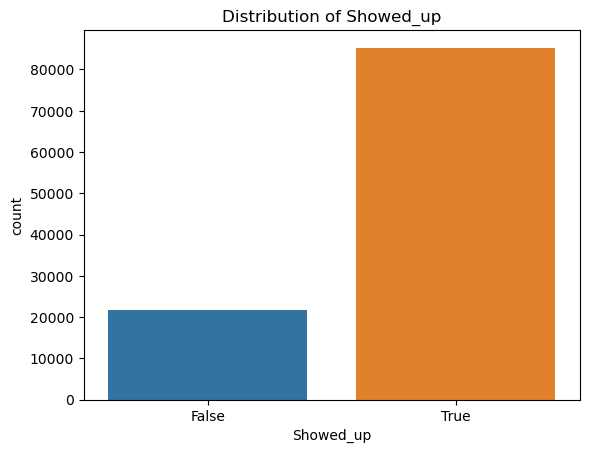

In [18]:
# Plot the distribution of the target variable 'Showed_up'
sns.countplot(x='Showed_up', data=df)
plt.title('Distribution of Showed_up')
plt.show()

##  Data Preprocessing

In [21]:
df.columns.tolist()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Showed_up',
 'Date.diff']

In [24]:
# Clean column names
df.columns = df.columns.str.strip()

In [25]:
# Convert dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [26]:
# Creating new feature: waiting days
df['waiting_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [27]:
# Encoding categorical variables
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Showed_up'] = df['Showed_up'].astype(int)


In [28]:
# Optional: drop irrelevant columns
df = df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], axis=1)

In [29]:
df.columns.tolist()

['Gender',
 'Age',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'Showed_up',
 'Date.diff',
 'waiting_days']

## Decision Tree

In [33]:
# Define features and target
X = df.drop('Showed_up', axis=1)
y = df['Showed_up']

In [34]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Train model
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [40]:
# Evaluation 
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7978783063837742
Confusion Matrix:
 [[    0  4325]
 [    0 17073]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4325
           1       0.80      1.00      0.89     17073

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



C:\Users\Anand singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anand singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anand singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Exploratory Analysis

df.to_csv("cleaned_healthcare_data.csv", index=False)
